# DFT e IDFT fourrier

In [1]:
import bruno as br
import numpy as np

In [2]:
x = np.array([1, 2, 3, 4])

# Calcula a DFT
X = br.DFT(x)
print("DFT:", X)

# Calcula a IDFT
x_reconstruido = br.IDFT(X)
print("\nDFT:", x_reconstruido.real)

DFT: [10.+0.00000000e+00j -2.+2.00000000e+00j -2.-9.79717439e-16j
 -2.-2.00000000e+00j]

DFT: [1. 2. 3. 4.]


### funçoes teste

In [3]:
import numpy as np
from scipy.linalg import dft


In [4]:
br.DFT_matrix(3)@np.array([2,5,6])

array([13. +0.j       , -3.5+0.8660254j, -3.5-0.8660254j])

In [5]:
br.DFT(np.array([2,5,6]))

array([13. +0.j       , -3.5+0.8660254j, -3.5-0.8660254j])

In [6]:
br.IDFT_matrix(3)

array([[ 1. +0.j       ,  1. +0.j       ,  1. +0.j       ],
       [ 1. +0.j       , -0.5+0.8660254j, -0.5-0.8660254j],
       [ 1. +0.j       , -0.5-0.8660254j, -0.5+0.8660254j]])

In [7]:
br.IDFT(br.DFT(np.array([2,5,6]))).real

array([2., 5., 6.])

### Usar modelos rand de temperatura

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

Primeiros 10 dias e temperaturas:
Dia 1: 31.91°C
Dia 2: 32.18°C
Dia 3: 36.12°C
Dia 4: 32.90°C
Dia 5: 31.31°C
Dia 6: 35.82°C
Dia 7: 33.30°C
Dia 8: 35.32°C
Dia 9: 31.90°C
Dia 10: 31.16°C


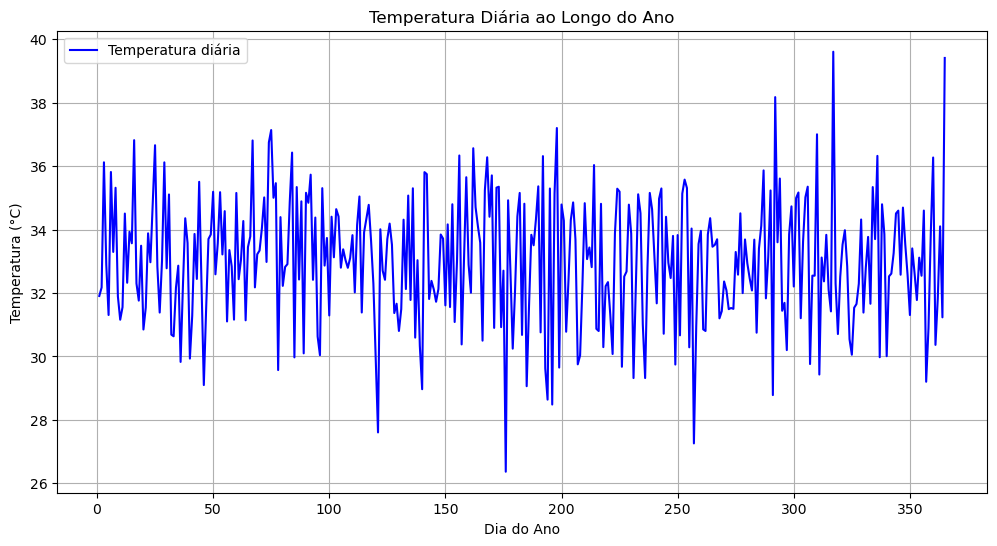

In [9]:
# Definindo os parâmetros
media_temperatura = 32.93  # Média anual
desvio_padrao = 2.0  # Desvio padrão para a variação das temperaturas
dias_ano = 365  # Número de dias no ano

# Gerando temperaturas aleatórias com distribuição normal
temperaturas = np.random.normal(loc=media_temperatura, scale=desvio_padrao, size=dias_ano)

# Criando um vetor de dias
dias = np.arange(1, dias_ano + 1)

# Exibindo os primeiros 10 valores como exemplo
print("Primeiros 10 dias e temperaturas:")
for dia, temp in zip(dias[:10], temperaturas[:10]):
    print(f"Dia {dia}: {temp:.2f}°C")

# Plotando as temperaturas
plt.figure(figsize=(12, 6))
plt.plot(dias, temperaturas, label='Temperatura diária', color='blue')
plt.xlabel('Dia do Ano')
plt.ylabel('Temperatura (°C)')
plt.title('Temperatura Diária ao Longo do Ano')
plt.legend()
plt.grid(True)
plt.show()

Primeiros 10 dias e temperaturas:
Dia 1: 31.15°C
Dia 2: 28.03°C
Dia 3: 28.62°C
Dia 4: 30.48°C
Dia 5: 32.75°C
Dia 6: 30.31°C
Dia 7: 35.77°C
Dia 8: 29.55°C
Dia 9: 33.61°C
Dia 10: 25.93°C


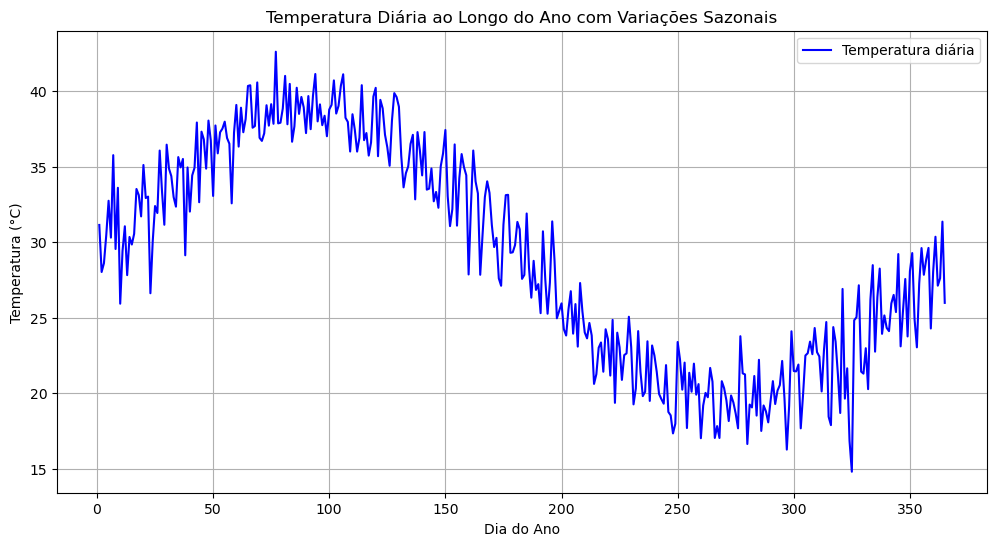

In [10]:
# Definindo os parâmetros
media_temperatura = 28.93  # Média anual
amplitude_variacao = 10.0  # Amplitude da variação sazonal
desvio_padrao = 2.0  # Desvio padrão para a variação das temperaturas aleatórias
dias_ano = 365  # Número de dias no ano

# Gerando o vetor de dias
dias = np.arange(1, dias_ano + 1)

# Criando uma função sazonal para representar as variações de temperatura ao longo do ano
# Assumindo um período de 365 dias para o ciclo anual
temperatura_sazonal = amplitude_variacao * np.sin(2 * np.pi * dias / dias_ano) + media_temperatura

# Adicionando variação aleatória à temperatura
temperaturas = temperatura_sazonal + np.random.normal(loc=0, scale=desvio_padrao, size=dias_ano)

# Exibindo os primeiros 10 valores como exemplo
print("Primeiros 10 dias e temperaturas:")
for dia, temp in zip(dias[:10], temperaturas[:10]):
    print(f"Dia {dia}: {temp:.2f}°C")

# Plotando as temperaturas
plt.figure(figsize=(12, 6))
plt.plot(dias, temperaturas, label='Temperatura diária', color='blue')
plt.xlabel('Dia do Ano')
plt.ylabel('Temperatura (°C)')
plt.title('Temperatura Diária ao Longo do Ano com Variações Sazonais')
plt.legend()
plt.grid(True)
plt.show()

## Vamos tentar fazer a transformada de Discreta de Fourier

In [11]:
freq = br.DFT(temperaturas)

/home/usuario/miniconda3/lib/python3.12/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/usuario/miniconda3/lib/python3.12/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


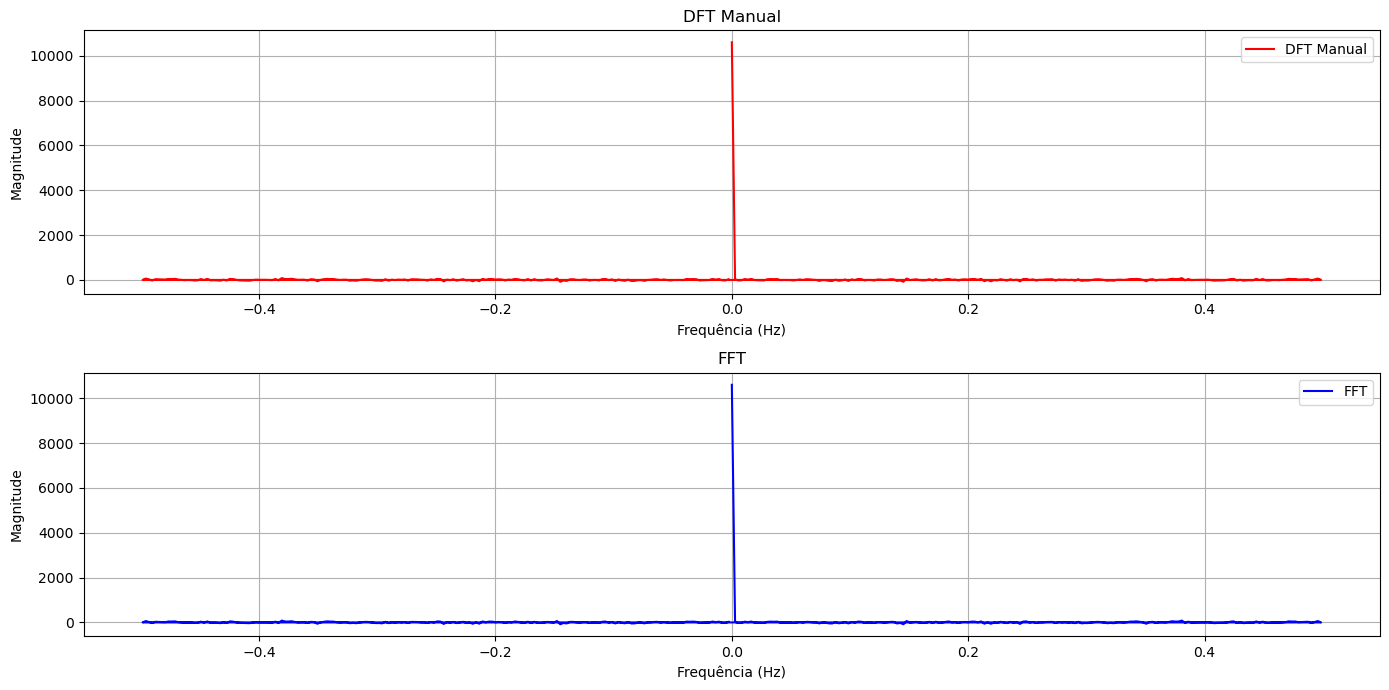

In [12]:
# Calcular a DFT manualmente
dft_result = br.DFT(temperaturas)

# Calcular a FFT
fft_result = np.fft.fft(temperaturas)

# Frequências
frequencias = np.fft.fftfreq(len(dias))

# Plotar os resultados
plt.figure(figsize=(14, 7))

# Plotar o módulo da DFT
plt.subplot(2, 1, 1)
plt.plot(frequencias, dft_result, label='DFT Manual', color='red')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Magnitude')
plt.title('DFT Manual')
plt.legend()
plt.grid(True)

# Plotar o módulo da FFT
plt.subplot(2, 1, 2)
plt.plot(frequencias, fft_result, label='FFT', color='blue')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Magnitude')
plt.title('FFT')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
# Plotar o módulo da DFT
plt.subplot(2, 1, 1)
plt.plot(frequencias, np.abs(dft_result.real), label='DFT Manual', color='red')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Magnitude')
plt.title('DFT Manual')
plt.xlim(-0.1, 0.1)
plt.legend()
plt.grid(True)

# Plotar o módulo da FFT
plt.subplot(2, 1, 2)
plt.plot(frequencias, np.abs(fft_result.real), label='FFT', color='blue')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Magnitude')
plt.title('FFT')
plt.xlim(-0.1, 0.1)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
def low_pass_filter(freqs, cutoff):
    """
    Cria um filtro passa-baixa.

    Parameters:
    freqs (numpy array): Frequências associadas à FFT.
    cutoff (float): Frequência de corte para o filtro passa-baixa.

    Returns:
    numpy array: Filtro passa-baixa aplicado às frequências.
    """
    filter_mask = np.abs(freqs) < cutoff
    return filter_mask

In [ ]:
sig = low_pass_filter(frequencias, 1/2500)

In [ ]:
# Aplicar filtro passa-baixa
cutoff_frequency = 1/250  # Ajuste a frequência de corte conforme necessário
filter_mask = low_pass_filter(frequencias, cutoff_frequency)
filtered_fft_result = fft_result * filter_mask

# Aplicar a IFFT para obter o sinal filtrado
filtered_dados = np.fft.ifft(filtered_fft_result)

# Plotar resultados
plt.figure(figsize=(14, 7))

# Plotar o sinal original
plt.subplot(3, 1, 1)
plt.plot(dias, temperaturas, label='Sinal Original')
plt.xlabel('Tempo (dias)')
plt.ylabel('Temperatura')
plt.title('Sinal Original')
plt.legend()
plt.grid(True)

# Plotar o módulo da FFT original
plt.subplot(3, 1, 2)
plt.plot(dias, frequencias, np.abs(fft_result), label='FFT Original', color='blue')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Magnitude')
plt.title('FFT Original')
plt.legend()
plt.grid(True)

# Plotar o módulo da FFT filtrada
plt.subplot(3, 1, 3)
plt.plot(frequencias, np.abs(filtered_fft_result), label='FFT Filtrada', color='red')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Magnitude')
plt.title('FFT Filtrada')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Plotar o sinal filtrado
plt.figure(figsize=(10, 5))
plt.plot(filtered_dados.real, label='Sinal Filtrado', color='green')
plt.xlabel('Tempo (dias)')
plt.ylabel('Temperatura')
plt.title('Sinal Filtrado')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
def high_pass_filter(freqs, cutoff):
    """
    Cria um filtro passa-baixa.
    
    Parameters:
    freqs (numpy array): Frequências associadas à FFT.
    cutoff (float): Frequência de corte para o filtro passa-baixa.

    Returns:
    numpy array: Filtro passa-baixa aplicado às frequências.
    """
    filter_mask = np.abs(freqs) > cutoff
    return filter_mask

In [ ]:
# Aplicar filtro passa-baixa
cutoff_frequency = 1/10000  # Ajuste a frequência de corte conforme necessário
filter_mask = high_pass_filter(frequencias, cutoff_frequency)
filtered_fft_result = fft_result * filter_mask

# Aplicar a IFFT para obter o sinal filtrado
filtered_dados = np.fft.ifft(filtered_fft_result)

# Plotar resultados
plt.figure(figsize=(14, 7))

# Plotar o sinal original
plt.subplot(3, 1, 1)
plt.plot(dias, temperaturas, label='Sinal Original')
plt.xlabel('Tempo (dias)')
plt.ylabel('Temperatura')
plt.title('Sinal Original')
plt.legend()
plt.grid(True)

# Plotar o módulo da FFT original
plt.subplot(3, 1, 2)
plt.plot(dias, frequencias, np.abs(fft_result), label='FFT Original', color='blue')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Magnitude')
plt.title('FFT Original')
plt.legend()
plt.grid(True)

# Plotar o módulo da FFT filtrada
plt.subplot(3, 1, 3)
plt.plot(frequencias, np.abs(filtered_fft_result), label='FFT Filtrada', color='red')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Magnitude')
plt.title('FFT Filtrada')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Plotar o sinal filtrado
plt.figure(figsize=(10, 3))
plt.plot(filtered_dados.real, label='Sinal Filtrado', color='green')
plt.xlabel('Tempo (dias)')
plt.ylabel('Temperatura')
plt.title('Sinal Filtrado')
plt.legend()
plt.grid(True)
plt.show()

## IDFT

In [ ]:
br.IDFT(dft_result)

In [ ]:
plt.figure(figsize=(15, 4))
plt.plot(dias, br.IDFT(dft_result))
plt.grid()
plt.title('Sinal Original reposto na IDFT')
plt.ylabel('Temperatura')
plt.xlabel('tempo (dias)')